In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

pd.__version__
%matplotlib inline


In [11]:
data = pd.read_csv('Gen.csv')
data.head()
data

,Year,ticketsSold,totalRevenue,totalNewMovies,totalMovie,ticketPrice,firsFilm,IMDBpoints
0,2016,58287316,691696424,360,529,11.87,Dağ 2,9.8
1,2015,60228409,678557824,402,530,11.27,Düğün Dernek 2: Sünnet,6.7
2,2014,61245258,652906723,359,559,10.66,Recep İvedik 4,4.0
3,2013,50295757,504346814,326,501,10.03,Düğün Dernek,7.4
4,2012,44339549,425630479,290,494,9.60,Fetih 1453,7.2
5,2011,42294040,398294091,291,432,9.42,Eyyvah Eyvah 2,6.8
6,2010,41534146,383369769,247,379,9.23,New York'ta Beş Minare,6.0
7,2009,36904345,307972617,254,363,8.35,Recep İvedik 2,4.3
8,2008,38414342,301505935,266,389,7.85,Recep İvedik,4.8
9,2007,31151309,242328644,256,398,7.78,Beyaz Melek,6.4


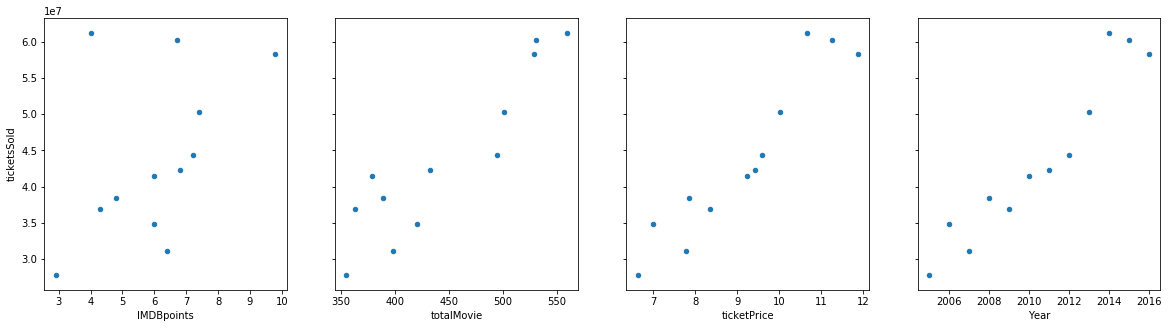

In [14]:
fig, axs= plt.subplots(1, 4, sharey = True)
data.plot(kind = 'scatter', x = 'IMDBpoints', y = 'ticketsSold', ax=axs[0], figsize=(20,5))
data.plot(kind = 'scatter', x = 'totalMovie', y = 'ticketsSold', ax=axs[1])
data.plot(kind = 'scatter', x = 'ticketPrice', y = 'ticketsSold', ax=axs[2])
data.plot(kind = 'scatter', x = 'Year', y = 'ticketsSold', ax=axs[3])




In [16]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
li = smf.ols(formula = 'ticketsSold ~ Year', data= data).fit()

li.params

Intercept   -5.978688e+09
Year         2.995590e+06
dtype: float64

In [19]:
xNew = pd.DataFrame({'ticketsSold':[data.ticketsSold.min(), data.ticketsSold.max()]})
xNew.head()


,ticketsSold
0,27801041
1,61245258


In [24]:
xNew = pd.DataFrame({'Year':[data.Year.min(), data.Year.max()]})
xNew.head()

,Year
0,2005
1,2016


In [25]:
assume = li.predict(xNew)
assume

array([ 27471065.29486942,  60422558.87179089])

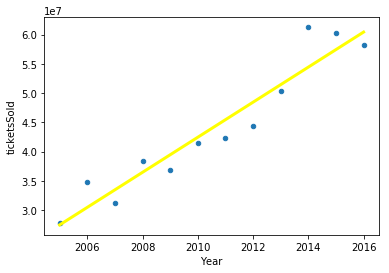

In [27]:
data.plot(kind = 'scatter', x = 'Year', y = 'ticketsSold')
plt.plot(xNew, assume,  c='yellow', linewidth=3)

In [28]:
lo = smf.ols(formula = 'ticketsSold ~ ticketPrice', data= data).fit()

lo.params

Intercept     -1.465045e+07
ticketPrice    6.411664e+06
dtype: float64

In [29]:
xNew2 = pd.DataFrame({'ticketPrice':[data.ticketPrice.min(), data.ticketPrice.max()]})
xNew2.head()


,ticketPrice
0,6.63
1,11.87


In [30]:
assumelo = lo.predict(xNew2)
assumelo

array([ 27858879.55305093,  61455996.70695849])

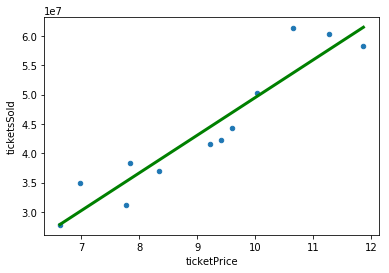

In [31]:
data.plot(kind = 'scatter', x = 'ticketPrice', y = 'ticketsSold')
plt.plot(xNew2, assumelo,  c='green', linewidth=3)